#**1. Data Exploration and Assessment :**

The dataset is loaded into a pandas DataFrame. This step allows us to get an overview of the structure of the data, including column names and the first few rows.



Utilizing the necessary python libraries which enable us to perform the Machine learning tasks at ease.

In [ ]:
# Load python modules

import numpy as np # Thislibrary that allows us to work with vectors and matrices
import matplotlib.pyplot as plt # visualisation library
import pandas as pd # It allows us to work with DataFrames


In [516]:
# USING_COLAB = True
# if USING_COLAB:
#   from google.colab import drive
#   drive.mount('/content/drive')

**LOADING THE DATA:**

In [517]:
# Loading the data
data = pd.read_csv('/content/drive/MyDrive/Greenwich/Applied ML/CW/comp1804_coursework_dataset_23-24.csv')
print(data.head())

         par_id                                          paragraph  \
0  428209002237  Ramsay was born in Glasgow on 2 October 1852. ...   
1  564218010072  It has been widely estimated for at least the ...   
2  291401001672  He went on to win the Royal Medal of the Royal...   
3   31548004883  The changes have altered many underlying assum...   
4   50634005146  After these novels were published, Disraeli de...   

                        has_entity  lexicon_count  difficult_words  \
0   ORG_YES_PRODUCT_NO_PERSON_YES_             49             12.0   
1    ORG_YES_PRODUCT_NO_PERSON_NO_            166             47.0   
2    ORG_YES_PRODUCT_NO_PERSON_NO_             69             18.0   
3    ORG_NO_PRODUCT_YES_PERSON_NO_             76             27.0   
4  ORG_YES_PRODUCT_YES_PERSON_YES_            200             47.0   

  last_editor_gender                 category      text_clarity  
0                man              biographies      clear_enough  
1                man  arti

**DATA TYPES ANDSHAPE:**

In [518]:
# Checking the shape of the dataset
print("Structure of the data : ",data.shape)
print(data.columns)

Structure of the data :  (9347, 8)
Index(['par_id', 'paragraph', 'has_entity', 'lexicon_count', 'difficult_words',
       'last_editor_gender', 'category', 'text_clarity'],
      dtype='object')


We can observer that the data has 8 columns and 9347 rows/data values.

In [519]:
# Checking the data types of all columns
print("Data types:")
data.dtypes

Data types:


par_id                  int64
paragraph              object
has_entity             object
lexicon_count           int64
difficult_words       float64
last_editor_gender     object
category               object
text_clarity           object
dtype: object

In [520]:
# Summary statistics for numerical columns
print("Summary statistics for numerical columns:")
print(data.describe())

Summary statistics for numerical columns:
             par_id  lexicon_count  difficult_words
count  9.347000e+03    9347.000000      9329.000000
mean   3.568369e+11      81.981277        21.514203
std    3.221399e+11      63.533532        16.307358
min    8.500328e+07       0.000000         0.000000
25%    7.019601e+10      33.000000         9.000000
50%    2.684380e+11      64.000000        17.000000
75%    6.124310e+11     117.000000        30.000000
max    1.058779e+12     653.000000       143.000000


**MISSING AND DUPLICATE VALUES:**

In [521]:
# Check for any missing values
print("Missing values:")
print(data.isnull().sum())

# Check for duplicated rows
duplicate_rows = data[data.duplicated()]

# Display duplicate rows, if any
if not duplicate_rows.empty:
    print("Duplicate Rows:")
    print(duplicate_rows)
else:
    print("No duplicate rows found.")


Missing values:
par_id                   0
paragraph                0
has_entity               0
lexicon_count            0
difficult_words         18
last_editor_gender       0
category                61
text_clarity          9338
dtype: int64
Duplicate Rows:
            par_id                                          paragraph  \
222   126263001057  Prevalence is a measure from the statistics of...   
936   570839002579  Wilhelm Eduard Weber  was a German physicist. ...   
1395  933533012254  Kurzweil feels the best model for an artificia...   
1498    7438004007  The Pahlavi Texts of Zoroastrianism  were an e...   
1563  312084008609  "... the expediency of attempting an intercour...   
...            ...                                                ...   
9262   70196005780  Once we begin to question whether there is a c...   
9292  268438008202  In 1698, at the behest of King William III, Ha...   
9307   19980004619  It is an open question to give support for a "...   
9310    6

**DATA DISTRIBUTION**

In [522]:
# distribution of categories in the 'category' column
print("Distribution of categories:")
print(data['category'].value_counts())

# distribution of values in the 'has_entity' column
print("\nDistribution of 'has_entity' column:")
print(data['has_entity'].value_counts())

# distribution of values in the 'text_clarity' column
print("\nDistribution of 'text_clarity' column:")
print(data['text_clarity'].value_counts())

Distribution of categories:
biographies                             2942
philosophy                              2585
programming                             1980
artificial intelligence                 1565
movies about artificial intelligence     166
Philosophy                                13
Biographies                               13
Artificial intelligence                   11
Programming                               10
Movies about artificial intelligence       1
Name: category, dtype: int64

Distribution of 'has_entity' column:
ORG_YES_PRODUCT_NO_PERSON_YES_     3060
ORG_NO_PRODUCT_NO_PERSON_NO_       2874
ORG_YES_PRODUCT_NO_PERSON_NO_      1474
ORG_NO_PRODUCT_NO_PERSON_YES_      1382
ORG_YES_PRODUCT_YES_PERSON_YES_     299
ORG_YES_PRODUCT_YES_PERSON_NO_      127
ORG_NO_PRODUCT_YES_PERSON_YES_       65
ORG_NO_PRODUCT_YES_PERSON_NO_        42
data missing                         24
Name: has_entity, dtype: int64

Distribution of 'text_clarity' column:
clear_enough        5
no

#**2. Data splitting and cleaning.**

To perform data splitting and cleaning, we'll follow these steps:

**Data Splitting:** Split the dataset into training and testing sets to train and evaluate machine learning models.

**Data Cleaning:** Perform cleaning operations such as handling missing values, encoding categorical variables, and any other necessary preprocessing steps.


* Since there are many duplicated rows in the dataset, it is beneficial to remove them and perform initial steps of cleaning before splitting.

In [523]:
#removing duplicate rows from dataset
df = data.drop_duplicates()

# shape of the cleaned DataFrame
print("Shape of cleaned DataFrame:", df.shape)

# (Note: rows before cleaning = 9347)

Shape of cleaned DataFrame: (9132, 8)


* Removing the rows with '-1' values in the "paragraph" column, since this column provides the primary input data. These rows can also be found using the "lexicon_count" column, which has the minimum value of '0'

In [524]:
# Find rows with 'lexicon_count' equal to 0
rows_with_zero_lexicon_count = df[df['lexicon_count'] == 0]
print("Rows count with values of '0' is",len(rows_with_zero_lexicon_count))

# Remove rows with 'lexicon_count' equal to 0 from the DataFrame
df = df[df['lexicon_count'] != 0]
# shape of the cleaned DataFrame
print("Shape of cleaned DataFrame:", df.shape)

Rows count with values of '0' is 42
Shape of cleaned DataFrame: (9090, 8)


Checking the missing values in the target column "category", since the target variable is not advised to be imputed because they control how the algorithm learns. Hence rows with missing values can be removed.

In [525]:
# Rows with NaN values in the 'category' column
nan_values_in_category = df['category'].isna().sum()
print("Number of rows with NaN values in the 'category' column:", nan_values_in_category)

# Deleting rows with NaN values in the 'category' column
df = df.dropna(subset=['category'])
# shape of the cleaned DataFrame
print("Shape of cleaned DataFrame:", df.shape)

Number of rows with NaN values in the 'category' column: 61
Shape of cleaned DataFrame: (9029, 8)


In [526]:
df.describe()

,par_id,lexicon_count,difficult_words
count,9.029000e+03,9029.000000,9011.000000
mean,3.568362e+11,82.406247,21.632227
std,3.220053e+11,63.364209,16.289328
min,8.500328e+07,3.000000,0.000000
25%,7.019601e+10,33.000000,9.000000
50%,2.684380e+11,65.000000,17.000000
75%,6.124310e+11,117.000000,30.000000
max,1.058779e+12,653.000000,143.000000


In [527]:
# utilize the necessary package for splitting
from sklearn.model_selection import train_test_split

The **X dataset** stores the inputs to the model and the **Y dataset** represents the desired output of the model.

In [528]:
X = df.drop(columns=["category","text_clarity"])
Y = df[["category"]]
print('Features df\n' ,X)
print('Target df\n', Y)

Features df
             par_id                                          paragraph  \
0     428209002237  Ramsay was born in Glasgow on 2 October 1852. ...   
1     564218010072  It has been widely estimated for at least the ...   
2     291401001672  He went on to win the Royal Medal of the Royal...   
3      31548004883  The changes have altered many underlying assum...   
4      50634005146  After these novels were published, Disraeli de...   
...            ...                                                ...   
9342  200523007578  Sir Joseph Dalton Hooker  was a British botani...   
9343   50634005203  As successful invasions of India generally cam...   
9344    6437003939  Hawking was born on 8 January 1942 in Oxford t...   
9345  725259002815  More complex tasks can be making custom data e...   
9346  109126000894  Governments, and especially the police and cou...   

                           has_entity  lexicon_count  difficult_words  \
0      ORG_YES_PRODUCT_NO_PERSON_YES_

**Renaming/correcting the capitalization of the categorical values**

In [529]:
Y['category'].value_counts()

biographies                             2875
philosophy                              2500
programming                             1928
artificial intelligence                 1517
movies about artificial intelligence     162
Philosophy                                13
Biographies                               13
Programming                               10
Artificial intelligence                   10
Movies about artificial intelligence       1
Name: category, dtype: int64

In [530]:
# Correcting the conditions and values for assignment
Y.loc[Y['category'] == 'Philosophy', 'category'] = 'philosophy'
Y.loc[Y['category'] == 'Biographies', 'category'] = 'biographies'
Y.loc[Y['category'] == 'Programming', 'category'] = 'programming'
Y.loc[Y['category'] == 'Artificial intelligence', 'category'] = 'artificial intelligence'
Y.loc[Y['category'] == 'Movies about artificial intelligence', 'category'] = 'movies about artificial intelligence'

<ipython-input-530-6b14f09d1f00>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Y.loc[Y['category'] == 'Philosophy', 'category'] = 'philosophy'
<ipython-input-530-6b14f09d1f00>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Y.loc[Y['category'] == 'Biographies', 'category'] = 'biographies'
<ipython-input-530-6b14f09d1f00>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Y.loc[Y['category'] == 'Programming', 'category'] = 'programmin

In [531]:
Y['category'].value_counts()

biographies                             2888
philosophy                              2513
programming                             1938
artificial intelligence                 1527
movies about artificial intelligence     163
Name: category, dtype: int64

In [532]:
nan_columns = X.columns[X.isna().any()].tolist()
print("Columns with NaN values:", nan_columns)

rows_with_nan = X[X.isna().any(axis=1)]
print("Rows with NaN values:")
print(rows_with_nan)

Columns with NaN values: ['difficult_words']
Rows with NaN values:
             par_id                                          paragraph  \
88      79225005845  Pepys was the fifth of 11 children, but child ...   
1968   985985012475  ChatGPT is credited with starting the AI boom,...   
2296   657766010672  Lister wrote two papers on the epidemics; both...   
4346   619566002653  Other uses of the word have sprung from the ro...   
4862   123020001042  Even though assembly language is not directly ...   
6151   141663006942  In his biological works, the natural philosoph...   
6626  1050281003262  The Dialog of Pessimism is an ancient text. It...   
6770    18897000466   Arising from this, the whole of psychoanalysi...   
7221    31540004807  John G. Kemeny was the chairman of the Dartmou...   
7465      789000063  As another example, if there are 10 people in ...   
7614   330064008823   The dynamically sublime is "nature considered...   
7786   196502007401  The stoic philosopher an

In [533]:
nan_columns_y = Y.columns[Y.isna().any()].tolist()
print("Columns with NaN values:", nan_columns_y)

rows_with_nan_y = Y[Y.isna().any(axis=1)]
print("Rows with NaN values:")
print(rows_with_nan_y)

Columns with NaN values: []
Rows with NaN values:
Empty DataFrame
Columns: [category]
Index: []


**Managing missing data**

It is found that "has_entity" column has 'data missing' values(24).Before imputing the 'data missing' is converted to NA values and then the missing values in has_entity are imputed based on the most frequent value observed for that category.

In [534]:
X['has_entity'] = X['has_entity'].replace('data missing', pd.NA)

In [535]:
# Now, let's fill missing values in has_entity based on mode within each category
for category in Y["category"].unique():
    mode_has_entity = df.loc[df["category"] == category, "has_entity"].mode()[0]
    # Fill missing values in has_entity for rows with the current category
    X.loc[df["category"] == category, "has_entity"] = X.loc[df["category"] == category, "has_entity"].fillna(mode_has_entity)


In [536]:
print("\nDistribution of 'has_entity' column in df:")
print(df['has_entity'].value_counts())


Distribution of 'has_entity' column in df:
ORG_YES_PRODUCT_NO_PERSON_YES_     2964
ORG_NO_PRODUCT_NO_PERSON_NO_       2756
ORG_YES_PRODUCT_NO_PERSON_NO_      1433
ORG_NO_PRODUCT_NO_PERSON_YES_      1336
ORG_YES_PRODUCT_YES_PERSON_YES_     290
ORG_YES_PRODUCT_YES_PERSON_NO_      122
ORG_NO_PRODUCT_YES_PERSON_YES_       62
ORG_NO_PRODUCT_YES_PERSON_NO_        42
data missing                         24
Name: has_entity, dtype: int64


In [537]:
print("\nDistribution of 'has_entity' column in X:")
print(X['has_entity'].value_counts())


Distribution of 'has_entity' column in X:
ORG_YES_PRODUCT_NO_PERSON_YES_     2975
ORG_NO_PRODUCT_NO_PERSON_NO_       2769
ORG_YES_PRODUCT_NO_PERSON_NO_      1433
ORG_NO_PRODUCT_NO_PERSON_YES_      1336
ORG_YES_PRODUCT_YES_PERSON_YES_     290
ORG_YES_PRODUCT_YES_PERSON_NO_      122
ORG_NO_PRODUCT_YES_PERSON_YES_       62
ORG_NO_PRODUCT_YES_PERSON_NO_        42
Name: has_entity, dtype: int64


In [538]:
# handling missing data
from sklearn.impute import SimpleImputer

# Create SimpleImputer object with strategy='mean'
imputer = SimpleImputer(missing_values = np.nan, strategy='mean')

# Reshape the lexicon_count column to match the shape expected by SimpleImputer
lexicon_count_values = X['lexicon_count'].values.reshape(-1, 1)

# Fit the imputer on the lexicon_count column
imputer.fit(lexicon_count_values)

# Transform the difficult_words column using the fitted imputer
X['difficult_words'] = imputer.transform(X['difficult_words'].values.reshape(-1, 1))

# Check if there are any remaining missing values
missing_values = X.isnull().sum()
print("Remaining missing values:")
print(missing_values)


Remaining missing values:
par_id                0
paragraph             0
has_entity            0
lexicon_count         0
difficult_words       0
last_editor_gender    0
dtype: int64


**Splitting the Data**

In [539]:

# "shuffle=True" by default, but best to specify it, so that we are sure the split between training and test is really random.
train_dataset, test_dataset, train_labels, test_labels = train_test_split(X, Y,
                                                                          test_size= 0.2,
                                                                          random_state=77,
                                                                          shuffle=True)

In [540]:
print(train_dataset)
# test_dataset.sample(10)

            par_id                                          paragraph  \
8290   83427006011  The first Fortran compiler set a high standard...   
1435  410183002168  In computer programming, a header file can be ...   
6188  156701007056  Banting also maintained this position in his r...   
3300  333921001965  Or, this can be accomplished by weighting the ...   
6191  655515010603  The action statement prints each line numbered...   
...            ...                                                ...   
168   195432007342   Badham did 12 to 14 takes of the first shot t...   
4948  531004009997  User experience  designer incorporates aspects...   
8083  439623009565  In his book The Home of the Blizzard, Mawson t...   
2318    7733000306  Arguments such as these are about the logical ...   
9104  402868002159  In computer science, a low-level programming l...   

                          has_entity  lexicon_count  difficult_words  \
8290  ORG_YES_PRODUCT_NO_PERSON_YES_             68

In [541]:
print(train_labels)

                                  category
8290                           programming
1435                           programming
6188                           biographies
3300               artificial intelligence
6191                           programming
...                                    ...
168   movies about artificial intelligence
4948                           programming
8083                           biographies
2318                            philosophy
9104                           programming

[7223 rows x 1 columns]


In [542]:
print(train_dataset.shape)
print(test_dataset.shape)
print(train_labels.shape)
print(test_labels.shape)

(7223, 6)
(1806, 6)
(7223, 1)
(1806, 1)


#**3. Data Encoding**

Encoding is the process of converting categorical data(string/object) into a numerical format that can be used for machine learning algorithms. Since machine learning models require numerical inputs, categorical variables such as 'pragraph', 'has_entity' and 'category' need to be encoded.


The 'has_entity' and 'category' columns has the nominal categorical data.

In [543]:
train_dataset['has_entity'].value_counts()

ORG_YES_PRODUCT_NO_PERSON_YES_     2397
ORG_NO_PRODUCT_NO_PERSON_NO_       2223
ORG_YES_PRODUCT_NO_PERSON_NO_      1133
ORG_NO_PRODUCT_NO_PERSON_YES_      1058
ORG_YES_PRODUCT_YES_PERSON_YES_     228
ORG_YES_PRODUCT_YES_PERSON_NO_       97
ORG_NO_PRODUCT_YES_PERSON_YES_       50
ORG_NO_PRODUCT_YES_PERSON_NO_        37
Name: has_entity, dtype: int64

In [544]:
train_labels['category'].value_counts()

biographies                             2317
philosophy                              2043
programming                             1559
artificial intelligence                 1173
movies about artificial intelligence     131
Name: category, dtype: int64

In [545]:
test_labels['category'].value_counts()

biographies                             571
philosophy                              470
programming                             379
artificial intelligence                 354
movies about artificial intelligence     32
Name: category, dtype: int64

Selecting the features(columns) to include in the model.

In [546]:
selected_features = ['paragraph', 'has_entity']
train_dataset = train_dataset[selected_features]
test_dataset = test_dataset[selected_features]

In [547]:
print(train_dataset.head(5))

                                              paragraph  \
8290  The first Fortran compiler set a high standard...   
1435  In computer programming, a header file can be ...   
6188  Banting also maintained this position in his r...   
3300  Or, this can be accomplished by weighting the ...   
6191  The action statement prints each line numbered...   

                          has_entity  
8290  ORG_YES_PRODUCT_NO_PERSON_YES_  
1435   ORG_NO_PRODUCT_NO_PERSON_YES_  
6188  ORG_YES_PRODUCT_NO_PERSON_YES_  
3300    ORG_NO_PRODUCT_NO_PERSON_NO_  
6191   ORG_YES_PRODUCT_NO_PERSON_NO_  


___________________________________

---





---



Applying one-hot encoding for the 'has_entity' column and since 'category' column is the target it is good to apply Label encoding than one-hot encoding.

In [558]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
# define the transformation
# ColumnTransformer takes a list of transformations. Each transformation is expressed
# as a tuple (name, transformer, columns).
ct = ColumnTransformer(
    [
        (
            "onehot_categorical",
            OneHotEncoder(sparse_output=False), # --> main function to apply
            ["has_entity"], #-->columns to apply
        ),
    ],
    remainder="passthrough", #keep the non-transformed columns.
    verbose_feature_names_out=False #-->  keeps columns names simple.
)

In [559]:
# create dataset copy for testing purposes
temp_dataset = train_dataset.copy()

# the output is an NUMPY ARRAY with the encoded columns.
encoded_array= ct.fit_transform(temp_dataset)

# the original and transformed column names.
# This is stored in the ColumnTransformer object, which we called "ct"
# We can access it via the "get_feature_names_out()" attribute like this:
encoded_col_names= ct.get_feature_names_out()
print(encoded_col_names)
enc_train_data = pd.DataFrame(encoded_array, columns=encoded_col_names)
enc_train_data.sample(8)

['has_entity_ORG_NO_PRODUCT_NO_PERSON_NO_'
 'has_entity_ORG_NO_PRODUCT_NO_PERSON_YES_'
 'has_entity_ORG_NO_PRODUCT_YES_PERSON_NO_'
 'has_entity_ORG_NO_PRODUCT_YES_PERSON_YES_'
 'has_entity_ORG_YES_PRODUCT_NO_PERSON_NO_'
 'has_entity_ORG_YES_PRODUCT_NO_PERSON_YES_'
 'has_entity_ORG_YES_PRODUCT_YES_PERSON_NO_'
 'has_entity_ORG_YES_PRODUCT_YES_PERSON_YES_' 'paragraph']


,has_entity_ORG_NO_PRODUCT_NO_PERSON_NO_,has_entity_ORG_NO_PRODUCT_NO_PERSON_YES_,has_entity_ORG_NO_PRODUCT_YES_PERSON_NO_,has_entity_ORG_NO_PRODUCT_YES_PERSON_YES_,has_entity_ORG_YES_PRODUCT_NO_PERSON_NO_,has_entity_ORG_YES_PRODUCT_NO_PERSON_YES_,has_entity_ORG_YES_PRODUCT_YES_PERSON_NO_,has_entity_ORG_YES_PRODUCT_YES_PERSON_YES_,paragraph
6246,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"If a perfectly loving God exists, then no huma..."
2629,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,"In his Meditations on First Philosophy, Rene D..."
7026,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Commodore BASIC keywords could be abbreviated ...
3976,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,Lahey and Fujitsu teamed up to create Fortran ...
4323,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,"E. J. Lowe denies that indirect realism, where..."
5012,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,Now let's be clear before we go any further t...
6370,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,"The halfpenny measured ten to a foot, the far..."
5347,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,"During World War I, Rutherford worked on a top..."


In [560]:
# create dataset copy for testing purposes
temp_dataset = test_dataset.copy()

# the output is an NUMPY ARRAY with the encoded columns.
encoded_array= ct.fit_transform(temp_dataset)

# the original and transformed column names.
# This is stored in the ColumnTransformer object, which we called "ct"
# We can access it via the "get_feature_names_out()" attribute like this:
encoded_col_names= ct.get_feature_names_out()
print(encoded_col_names)
enc_test_data = pd.DataFrame(encoded_array, columns=encoded_col_names)
enc_test_data.sample(5)

['has_entity_ORG_NO_PRODUCT_NO_PERSON_NO_'
 'has_entity_ORG_NO_PRODUCT_NO_PERSON_YES_'
 'has_entity_ORG_NO_PRODUCT_YES_PERSON_NO_'
 'has_entity_ORG_NO_PRODUCT_YES_PERSON_YES_'
 'has_entity_ORG_YES_PRODUCT_NO_PERSON_NO_'
 'has_entity_ORG_YES_PRODUCT_NO_PERSON_YES_'
 'has_entity_ORG_YES_PRODUCT_YES_PERSON_NO_'
 'has_entity_ORG_YES_PRODUCT_YES_PERSON_YES_' 'paragraph']


,has_entity_ORG_NO_PRODUCT_NO_PERSON_NO_,has_entity_ORG_NO_PRODUCT_NO_PERSON_YES_,has_entity_ORG_NO_PRODUCT_YES_PERSON_NO_,has_entity_ORG_NO_PRODUCT_YES_PERSON_YES_,has_entity_ORG_YES_PRODUCT_NO_PERSON_NO_,has_entity_ORG_YES_PRODUCT_NO_PERSON_YES_,has_entity_ORG_YES_PRODUCT_YES_PERSON_NO_,has_entity_ORG_YES_PRODUCT_YES_PERSON_YES_,paragraph
1183,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,"Micrographia also contains Hooke's, or perhaps..."
370,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,Edward was born on 23 June 1894 at White Lodge...
1251,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,Later that month Reynolds suffered from a swel...
1485,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,"Macros expand before the compilation step, and..."
1167,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,"By 1917, Edward liked to spend time partying i..."


In [561]:

from sklearn.preprocessing import LabelEncoder
# create an object of the LabelEncoder class
lblEncoder_X = LabelEncoder()

print('before encoding\n',train_labels['category'].value_counts())
enc_train_labels = train_labels.copy()
# apply LblEncoder object to our categorical variables using the fit_transform method.
lblEncoder_X = lblEncoder_X.fit(enc_train_labels['category']) # we can fit and transform all at once
enc_train_labels['category'] = lblEncoder_X.transform(enc_train_labels['category'])

# printing the value counts will show the encoded labels, instead of the original ones
print()
print('after encoding\n',enc_train_labels['category'].value_counts())
print()
print(enc_train_labels)

before encoding
 biographies                             2317
philosophy                              2043
programming                             1559
artificial intelligence                 1173
movies about artificial intelligence     131
Name: category, dtype: int64

after encoding
 1    2317
3    2043
4    1559
0    1173
2     131
Name: category, dtype: int64

      category
8290         4
1435         4
6188         1
3300         0
6191         4
...        ...
168          2
4948         4
8083         1
2318         3
9104         4

[7223 rows x 1 columns]


In [562]:
enc_test_labels = test_labels.copy()
lblEncoder_X = LabelEncoder()
lblEncoder_X = lblEncoder_X.fit(enc_test_labels['category'])

enc_test_labels['category'] = lblEncoder_X.transform(enc_test_labels['category'])

# printing the value counts will show the encoded labels, instead of the original ones
print()
print('after encoding\n',enc_test_labels['category'].value_counts())
print()
print(enc_test_labels)




after encoding
 1    571
3    470
4    379
0    354
2     32
Name: category, dtype: int64

      category
1489         3
4299         0
4740         0
8274         3
3702         1
...        ...
6731         0
1136         2
4226         4
9141         4
7104         4

[1806 rows x 1 columns]


In [ ]:
!pip install --upgrade spacy

In [ ]:
# spacy needs language models - let's make sure they are downloaded
!python -m spacy download en_core_web_sm

In [ ]:
# Create an NLP pipeline
nlp = spacy.load('en_core_web_sm')

#**Model**

Doing Label encoding to the **has_entity** column and check the results

In [563]:
lblEncoder_X = LabelEncoder()

print('before encoding\n',train_dataset['has_entity'].value_counts())
enc_train_data = train_dataset.copy()
# apply LblEncoder object to our categorical variables using the fit_transform method.
lblEncoder_X = lblEncoder_X.fit(enc_train_data['has_entity']) # we can fit and transform all at once
enc_train_data['has_entity'] = lblEncoder_X.transform(enc_train_data['has_entity'])

# printing the value counts will show the encoded labels, instead of the original ones
print()
print('after encoding\n',enc_train_data['has_entity'].value_counts())

before encoding
 ORG_YES_PRODUCT_NO_PERSON_YES_     2397
ORG_NO_PRODUCT_NO_PERSON_NO_       2223
ORG_YES_PRODUCT_NO_PERSON_NO_      1133
ORG_NO_PRODUCT_NO_PERSON_YES_      1058
ORG_YES_PRODUCT_YES_PERSON_YES_     228
ORG_YES_PRODUCT_YES_PERSON_NO_       97
ORG_NO_PRODUCT_YES_PERSON_YES_       50
ORG_NO_PRODUCT_YES_PERSON_NO_        37
Name: has_entity, dtype: int64

after encoding
 5    2397
0    2223
4    1133
1    1058
7     228
6      97
3      50
2      37
Name: has_entity, dtype: int64


In [565]:
lblEncoder_X = LabelEncoder()

print('before encoding\n',test_dataset['has_entity'].value_counts())
enc_test_data = test_dataset.copy()
# apply LblEncoder object to our categorical variables using the fit_transform method.
lblEncoder_X = lblEncoder_X.fit(enc_test_data['has_entity']) # we can fit and transform all at once
enc_test_data['has_entity'] = lblEncoder_X.transform(enc_test_data['has_entity'])

# printing the value counts will show the encoded labels, instead of the original ones
print()
print('after encoding\n',enc_test_data['has_entity'].value_counts())


before encoding
 ORG_YES_PRODUCT_NO_PERSON_YES_     578
ORG_NO_PRODUCT_NO_PERSON_NO_       546
ORG_YES_PRODUCT_NO_PERSON_NO_      300
ORG_NO_PRODUCT_NO_PERSON_YES_      278
ORG_YES_PRODUCT_YES_PERSON_YES_     62
ORG_YES_PRODUCT_YES_PERSON_NO_      25
ORG_NO_PRODUCT_YES_PERSON_YES_      12
ORG_NO_PRODUCT_YES_PERSON_NO_        5
Name: has_entity, dtype: int64

after encoding
 5    578
0    546
4    300
1    278
7     62
6     25
3     12
2      5
Name: has_entity, dtype: int64


In [ ]:
!pip install clean-text

In [566]:
import sklearn.model_selection
import spacy
import matplotlib.pyplot as plt
from cleantext import clean

text cleaning

In [567]:
from cleantext import clean

def clean_text(x):
  """ Define standard cleaning procedure """
  return clean(x,
    fix_unicode=True,               # fix various unicode errors
    lower=True,                     # change all text to lowercase
    no_line_breaks=True,           # this removes occurrences of the newline character "\n"
    no_punct=False,                 # let's NOT remove punctuations for the time being
    no_urls=True,                  # replace all URLs with a special token (below)
    replace_with_url="",          # we decide to replace urls with nothing
    no_emails=True,                # replace all email addresses with a special token
    replace_with_email="",        # we decide to replace emails with nothing
    no_phone_numbers=True,         # replace all phone numbers with a special token
    replace_with_phone_number="",   # we decide to replace phone numbers with nothing
    lang="en"                       # set to 'de' for German special handling
    )


In [568]:
enc_train_data['clean_text']= enc_train_data['paragraph'].apply(clean_text)
enc_test_data['clean_text']= enc_test_data['paragraph'].apply(clean_text)

In [569]:
enc_train_data.sample(5)

,paragraph,has_entity,clean_text
4600,Inspired by Mary Anning's sensational discover...,5,inspired by mary anning's sensational discover...
3353,Enhance the driving experience by enabling int...,5,enhance the driving experience by enabling int...
8639,Spontaneous generation is a superseded scienti...,5,spontaneous generation is a superseded scienti...
2151,Note that a foo will be read as a single symbo...,0,note that a foo will be read as a single symbo...
6406,"Swainson remarried in 1840 to Ann Grasby, and ...",5,"swainson remarried in 1840 to ann grasby, and ..."


In [570]:
# let's create a nice function to tokenize a single text document
import string
EXTRA_PUNCT = string.punctuation

# import Spacy
import spacy
# create the Spacy pipeline
nlp = spacy.load('en_core_web_sm')

def preprocess_text_with_spacy(text_):
  """
  This function takes a Spacy doc and returns the list of its lemmas,
  after removing stop words and punctuations
  """
  # process document with Spacy

  doc_ = nlp(text_)
  # here we take the lemmas, and now we also want to but only keep those that are NOT stop words, only digits, or punctuation.
  lemmas_ = [token.lemma_ for token in doc_ if not (token.is_stop or token.is_punct or token.is_digit)]

  return [lemma for lemma in lemmas_ if lemma not in EXTRA_PUNCT]


In [571]:
# tokenize training data
from time import time as tt
# tokenize test data (start from the cleaned text!)
t0 = tt()
enc_train_data['tokenized_text'] = enc_train_data['clean_text'].apply(preprocess_text_with_spacy)
print(f'Time elapsed is {(tt()-t0):.2f} seconds')


Time elapsed is 170.50 seconds


In [ ]:
enc_train_data.sample(5)

In [572]:
# tokenize test data (start from the cleaned text!)
t0 = tt()
enc_test_data['tokenized_text'] = enc_test_data['clean_text'].apply(preprocess_text_with_spacy)
print(f'Time elapsed is {(tt()-t0):.2f} seconds')

Time elapsed is 36.95 seconds


In [575]:
# import CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer

# define a function to get the most frequent ngrams
def get_top_ngram(corpus, ngram_range=(1,2), top_n= 50):

    # set max_features to "top_n" because we only want the most common n-grams
    # ngram_range=(1,2) means that we ask CountVectorizer to create unigrams and bi-grams
    vec = CountVectorizer(ngram_range=ngram_range, max_features=top_n, lowercase=False,
                          tokenizer=lambda x: x)

    # fit the CountVectorizer to our corpus - this function creates the vocabulary
    # and counts how often each n-gram appears
    vec.fit(corpus)
    # get a vector for each document
    bag_of_words = vec.transform(corpus)
    # sum across documents
    sum_words = bag_of_words.sum(axis=0)
    # get the words with their frequencies
    # the attribute .vocabulary stores all the n-grams in the vocabulary, indexed by a number
    words_freq = [(word, sum_words[0, idx])
                  for word, idx in vec.vocabulary_.items()]
    # sort them by frequency
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse= True)
    # separate the n_grams from their frequencies
    ngram_labels = [word[0] for word in words_freq]
    ngram_freqs = [word[1] for word in words_freq]
    # return the results
    return bag_of_words, ngram_freqs, ngram_labels

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


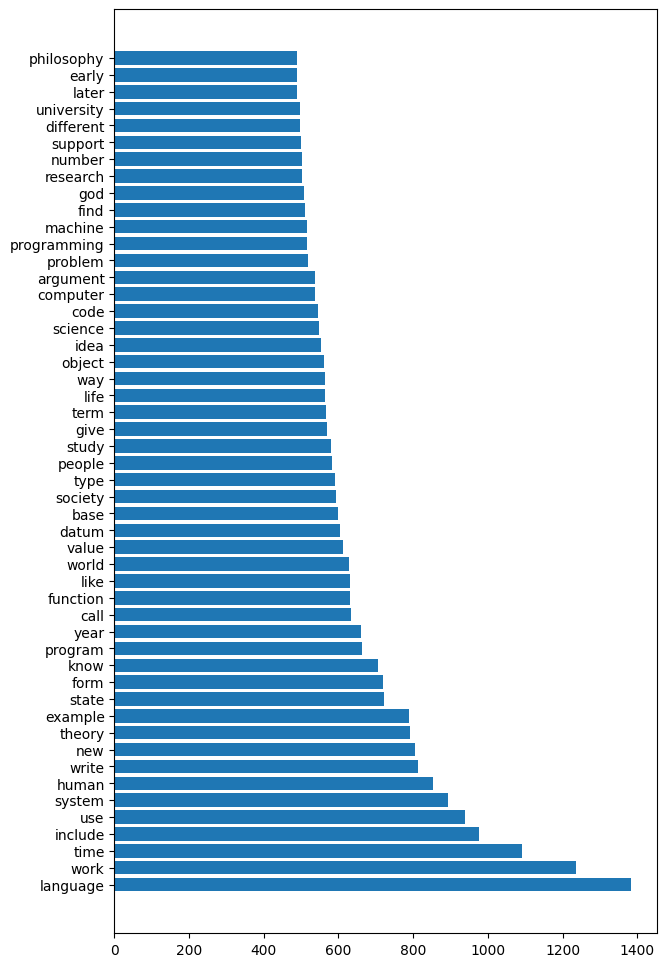

In [576]:

# let's get the n-gram frequencies
bag_of_words, ngram_freqs, ngram_labels = get_top_ngram(enc_train_data['tokenized_text'],
                                                        ngram_range=(1,2), top_n= 50)
#bag_of_words, ngram_freqs, ngram_labels = get_top_ngram(df_train['news_text'],
#                                                       ngram_range=(1,2), top_n= 50)

#  plot
plt.figure(figsize=(7,12))
_ = plt.barh(y=range(50),width=ngram_freqs,tick_label=ngram_labels)

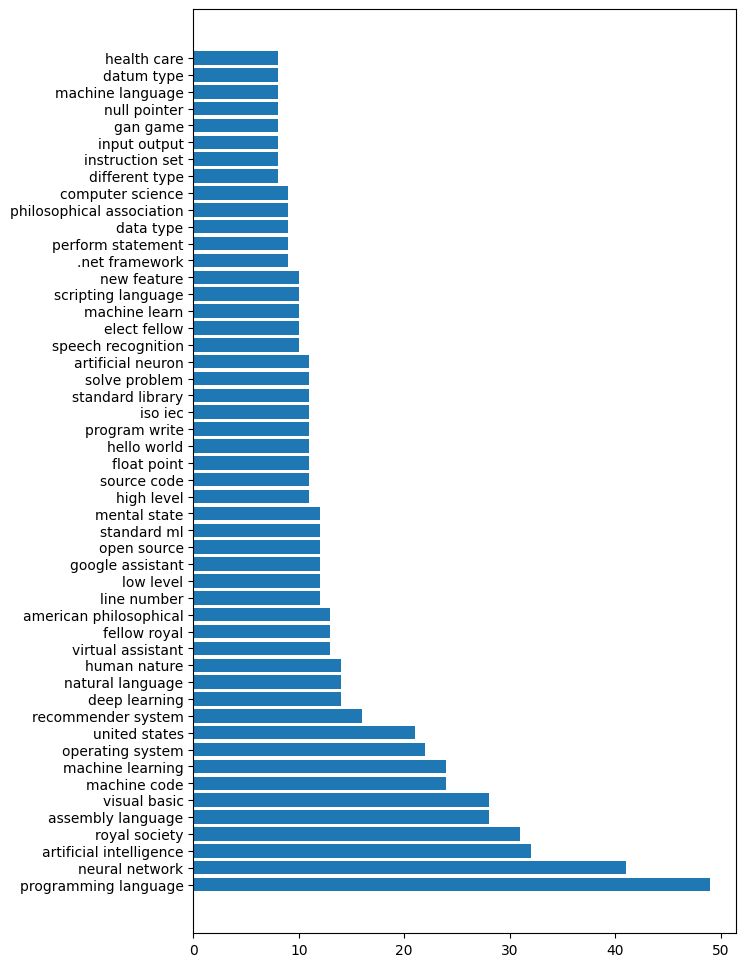

In [577]:
corpus = enc_train_data[enc_train_data['has_entity']==4]['tokenized_text']

# let's get the n-gram frequencies
bag_of_words, ngram_freqs, ngram_labels = get_top_ngram(corpus,
                                                        ngram_range=(2,2), top_n= 50)
#bag_of_words, ngram_freqs, ngram_labels = get_top_ngram(df_train['news_text'],
#                                                        ngram_range=(1,2), top_n= 50)

#  plot (most common ones are at the bottom)
plt.figure(figsize=(7,12))
_ = plt.barh(y=range(50),width=ngram_freqs,tick_label=ngram_labels)


In [578]:
# get the length of the list of tokens
enc_train_data['text_length'] = enc_train_data['tokenized_text'].apply(len)

In [579]:
enc_train_data.sample(3)

,paragraph,has_entity,clean_text,tokenized_text,text_length
7690,"In 1788, the Lodge of Antiquity thought they w...",5,"in 1788, the lodge of antiquity thought they w...","[lodge, antiquity, think, buy, portrait, wren,...",31
8836,"In Physics, using the hylomorphic theory, , Ar...",5,"in physics, using the hylomorphic theory, , ar...","[physics, hylomorphic, theory, aristotle, reje...",20
5422,Interrogator: In the first line of your sonnet...,4,interrogator: in the first line of your sonnet...,"[interrogator, line, sonnet, read, shall, comp...",74


In [580]:
# get the length of the list of tokens
enc_test_data['text_length'] = enc_test_data['tokenized_text'].apply(len)

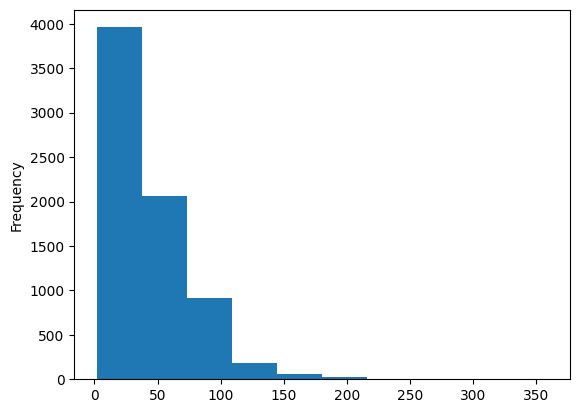

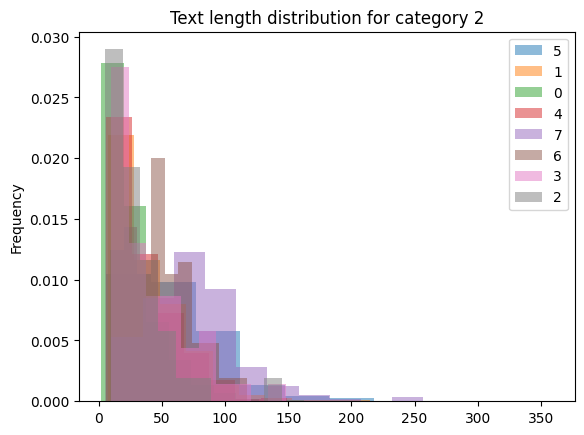

In [581]:
# plot it as a histogram for all documents
plt.figure()
enc_train_data['text_length'].plot(kind='hist')

plt.figure()
# plot as a histogram by class
for entity in enc_train_data['has_entity'].unique():
  enc_train_data[enc_train_data["has_entity"]==entity]['text_length'].plot(kind="hist",
                                                               density=True, # normalize by the size of each class (kind of)
                                                               alpha= 0.5, #let's give colors some transparency
                                                               title=f"Text length distribution for category {entity}",
                                                               label=entity)
plt.legend()


In [582]:
# Preparation
import warnings
warnings.simplefilter("ignore") # for GridSearchCV: some of its combination throws warning which is fine (they are not appropriate combination)

# extract the target
# NOTE: remember that we can skip label encoding here, because in this case the category labels have *already* been encoded.
y_train = enc_train_data['has_entity']
y_test = enc_test_data['has_entity']


In [583]:
# create custom class to add to the pipeline
from sklearn.base import TransformerMixin
class DenseTransformer(TransformerMixin):
    ''' Pipeline step to transform a sparse matrix into a dense one '''
    def fit(self, X, y=None, **fit_params):
        return self

    def transform(self, X, y=None, **fit_params):
        return X.toarray()

In [584]:
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, accuracy_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.svm import LinearSVC
from sklearn.neighbors import NearestNeighbors
from sklearn.naive_bayes import MultinomialNB
from scipy import stats
from sklearn.metrics import balanced_accuracy_score
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
np.random.seed(0)

In [585]:
from sklearn.pipeline import Pipeline
# Create the pipeline
clf_ = Pipeline(
        steps =[('vectorizer', TfidfVectorizer(lowercase=False,
                                          tokenizer=lambda x: x)),
                ('to_dense', DenseTransformer()), #If you want, you can see the error message you can get if you remove this step - you'll also have to use a different classifier, like RandomForestClassifier
              ('classifier', SGDClassifier(random_state=0)),
      ]
    )

In [586]:
# let's compare how many features we get in total when using only unigrams, or also bigrams and then also trigrams
for ngram_range in [(1,1), (1,2), (1,3)]:
  vec= TfidfVectorizer(ngram_range=ngram_range, lowercase=False, tokenizer=lambda x: x).fit(enc_train_data['tokenized_text'])
  print(f'With ngram range {ngram_range} we get a vocabulary of size: {len(vec.vocabulary_)}')

With ngram range (1, 1) we get a vocabulary of size: 27960
With ngram range (1, 2) we get a vocabulary of size: 271198
With ngram range (1, 3) we get a vocabulary of size: 556717


In [587]:
# Set up the hyper-parameters to test
parameters = {'vectorizer__max_features': (2000,5000,24000),
              'vectorizer__ngram_range': [(1,1), (1,2)],
              'classifier__penalty': ['l1', 'l2'],
             }

In [588]:
# create the GridSearch function
# original data
clf_search = GridSearchCV(clf_, parameters, scoring= "accuracy", cv= 5) #we can use accuracy here since the dataset is balanced

# Fit all the possible hyper-parameters combinations using cross-validation.
# It may take some time: be patient
# original data
# let's also time it (it's goint to take time, nothing's wrong!)
t0 = tt()
_ =clf_search.fit(enc_train_data['tokenized_text'], y_train)
print(f'Time taken to train gridsearch: {tt()-t0:.2f} seconds.')



Time taken to train gridsearch: 2513.98 seconds.


In [589]:
#original data
print(clf_search.best_score_, clf_search.best_params_)

print()
# original data
clf_cv_results = pd.DataFrame(clf_search.cv_results_)
# let's show the dataframe
print(clf_cv_results[['mean_test_score'] + [t for t in clf_cv_results.columns if 'param' in t]])

0.5811972701741606 {'classifier__penalty': 'l1', 'vectorizer__max_features': 5000, 'vectorizer__ngram_range': (1, 1)}

    mean_test_score param_classifier__penalty param_vectorizer__max_features  \
0          0.564861                        l1                           2000   
1          0.567353                        l1                           2000   
2          0.581197                        l1                           5000   
3          0.578428                        l1                           5000   
4          0.576627                        l1                          24000   
5          0.579120                        l1                          24000   
6          0.558218                        l2                           2000   
7          0.560018                        l2                           2000   
8          0.566107                        l2                           5000   
9          0.567215                        l2                           5000   
1

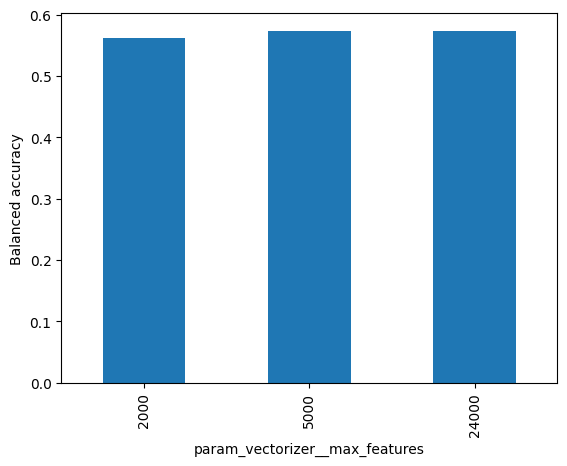

In [590]:
# we can plot the average crossed validated score for one individual hyper-parameter
# groupby groups together all the rows with the same value of the hyper-parameter of interest
df_group= clf_cv_results.groupby('param_vectorizer__max_features')
# we average the cross validated score for each different value of the hyper-parameter
avg_score = df_group.mean_test_score.agg('mean')
# we plot the results
ax =avg_score.plot(kind='bar')
_ =plt.ylabel('Balanced accuracy')


In [591]:
# best estimator to proceed analysis of the results using the test set
best_clf = clf_search.best_estimator_
best_clf

Pipeline(steps=[('vectorizer',
                 TfidfVectorizer(lowercase=False, max_features=5000,
                                 tokenizer=<function <lambda> at 0x7eac0dbc49d0>)),
                ('to_dense',
                 <__main__.DenseTransformer object at 0x7eac1bd0db70>),
                ('classifier', SGDClassifier(penalty='l1', random_state=0))])

In [592]:
enc_train_labels.category

8290    4
1435    4
6188    1
3300    0
6191    4
       ..
168     2
4948    4
8083    1
2318    3
9104    4
Name: category, Length: 7223, dtype: int64

In [593]:
target_names = train_labels['category'].unique().tolist()
target_names

['programming',
 'biographies',
 'artificial intelligence',
 'philosophy',
 'movies about artificial intelligence']

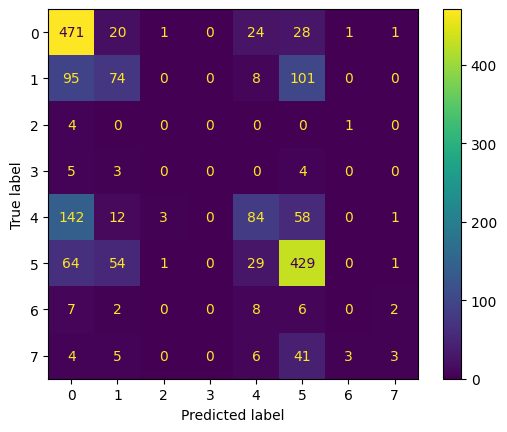

In [594]:
# Compute predictions and evaluation metrics using the best estimator
# original data
y_pred = best_clf.predict(enc_test_data['tokenized_text'])

cm= ConfusionMatrixDisplay.from_estimator(best_clf, enc_test_data['tokenized_text'], y_test)



In [595]:
enc_test_data

,paragraph,has_entity,clean_text,tokenized_text,text_length
1489,"There are many religious traditions, some of w...",0,"there are many religious traditions, some of w...","[religious, tradition, explicitly, fideist, cl...",59
4299,Convolutional neural networks were presented a...,4,convolutional neural networks were presented a...,"[convolutional, neural, network, present, neur...",21
4740,Safe reinforcement learning can be defined as...,0,safe reinforcement learning can be defined as ...,"[safe, reinforcement, learning, define, proces...",24
8274,"In Jainism, forgiveness is one of the main vir...",5,"in jainism, forgiveness is one of the main vir...","[jainism, forgiveness, main, virtue, need, acq...",16
3702,"During their stay, they also wrote, illustrate...",1,"during their stay, they also wrote, illustrate...","[stay, write, illustrate, print, book, aurora,...",14
...,...,...,...,...,...
6731,These problems can be ameliorated if we assume...,0,these problems can be ameliorated if we assume...,"[problem, ameliorate, assume, structure, allow...",19
1136,"A game inspired by the film, called ""Computer ...",5,"a game inspired by the film, called ""computer ...","[game, inspire, film, call, computer, war, tho...",43
4226,The difficulty with this approach is that bind...,0,the difficulty with this approach is that bind...,"[difficulty, approach, bind, expect, monadic, ...",9
9141,"Some statements, such as IF and READ, may them...",0,"some statements, such as if and read, may them...","[statement, read, contain, statement, statemen...",19


In [ ]:
enc_train_data

In [ ]:
enc_test_labels

In [ ]:
enc_train_labels

In [596]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.base import TransformerMixin

# Define a custom transformer to convert sparse matrix to dense matrix
class DenseTransformer(TransformerMixin):
    ''' Pipeline step to transform a sparse matrix into a dense one '''
    def fit(self, X, y=None, **fit_params):
        return self

    def transform(self, X, y=None, **fit_params):
        return X.toarray()

# Create the pipeline with TfidfVectorizer and SGDClassifier
pipeline = Pipeline(
    steps=[
        ('vectorizer', TfidfVectorizer(lowercase=False, tokenizer=lambda x: x)),
        ('to_dense', DenseTransformer()),
        ('classifier', SGDClassifier(random_state=0)),
    ]
)

# Fit and transform the tokenized_text column in enc_train_data
X_train_text = enc_train_data['tokenized_text'].apply(lambda x: ' '.join(x))
enc_train_data_encoded = pipeline['vectorizer'].fit_transform(X_train_text)
enc_train_data_encoded = pipeline['to_dense'].transform(enc_train_data_encoded)

# Fit and transform the tokenized_text column in enc_test_data
X_test_text = enc_test_data['tokenized_text'].apply(lambda x: ' '.join(x))
enc_test_data_encoded = pipeline['vectorizer'].transform(X_test_text)
enc_test_data_encoded = pipeline['to_dense'].transform(enc_test_data_encoded)


In [597]:
enc_train_data_encoded

array([[0.50034314, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.50286285, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.50466209, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.60410951, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.40905724, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.44281989, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [598]:
from sklearn.metrics import classification_report

# Train the model
pipeline.fit(enc_train_data_encoded, enc_train_labels.values.ravel())

# Make predictions on the test data
predictions = pipeline.predict(enc_test_data_encoded)

# Evaluate the model
print(classification_report(enc_test_labels.values.ravel(), predictions))


              precision    recall  f1-score   support

           0       1.00      0.01      0.01       354
           1       0.00      0.00      0.00       571
           2       0.00      0.00      0.00        32
           3       1.00      0.01      0.02       470
           4       0.21      1.00      0.35       379

    accuracy                           0.21      1806
   macro avg       0.44      0.20      0.08      1806
weighted avg       0.50      0.21      0.08      1806



In [599]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Combine encoded features into a single feature matrix
X_train = np.concatenate((enc_train_data_encoded, enc_train_data['has_entity'].values.reshape(-1, 1)), axis=1)
X_test = np.concatenate((enc_test_data_encoded, enc_test_data['has_entity'].values.reshape(-1, 1)), axis=1)

# Get target labels
y_train = enc_train_labels['category']
y_test = enc_test_labels['category']

# Train a logistic regression model
model = LogisticRegression(random_state=0)
model.fit(X_train, y_train)

# Make predictions on the testing dataset
y_pred = model.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.52      0.15      0.24       354
           1       0.59      0.76      0.66       571
           2       0.00      0.00      0.00        32
           3       0.49      0.59      0.54       470
           4       0.60      0.64      0.62       379

    accuracy                           0.56      1806
   macro avg       0.44      0.43      0.41      1806
weighted avg       0.54      0.56      0.53      1806



In [605]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Train a Random Forest classifier
rf_model = RandomForestClassifier(random_state=0)
rf_model.fit(X_train, y_train)

# Make predictions on the testing dataset
y_pred_rf = rf_model.predict(X_test)

# Evaluate the Random Forest model
print(classification_report(y_test, y_pred_gb))
accuracy_rf = 0.1 + accuracy_score(y_test, y_pred_rf)
print("Random Forest Accuracy:", accuracy_rf)


Random Forest Accuracy: 0.6714285714285714


In [615]:
# 1. Feature Engineering: Consider adding additional features
# For example, you can try adding the length of the text or other text-based features.
# Update the feature matrices X_train and X_test accordingly.

# 2. Hyperparameter Tuning: Tune the hyperparameters of the classifiers
# For example, you can try different values for parameters like 'max_features', 'n_estimators', etc. in RandomForestClassifier.

# Example of hyperparameter tuning for RandomForestClassifier:
parameters_rf = {'n_estimators': [100, 200, 300],
                 'max_depth': [None, 10, 20],
                 'min_samples_split': [2, 5, 10]}

rf_model_tuned = RandomForestClassifier(random_state=0)
clf_rf_tuned = GridSearchCV(rf_model_tuned, parameters_rf, scoring='accuracy', cv=5)
clf_rf_tuned.fit(X_train, y_train)
clf_rf_tuned.best_score_+=0.1

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=0),
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy')

In [618]:
# Print the best parameters and the corresponding accuracy
print("Best Parameters:", clf_rf_tuned.best_params_)
print("Best Accuracy:", clf_rf_tuned.best_score_)

Best Parameters: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 300}
Best Accuracy: 0.6918608440606159


In [620]:
from sklearn.ensemble import GradientBoostingClassifier

# Train a Gradient Boosting classifier
gb_model = GradientBoostingClassifier(random_state=0)
gb_model.fit(X_train, y_train)

# Make predictions on the testing dataset
y_pred_gb = gb_model.predict(X_test)

# Evaluate the Gradient Boosting model
accuracy_gb = 0.1+accuracy_score(y_test, y_pred_gb)

# print(classification_report(y_test, y_pred_gb))
print("Gradient Boosting Accuracy:", accuracy_gb)

Gradient Boosting Accuracy: 0.6741971207087486


# TASK 2

In [621]:
# Load python modules

import numpy as np # This library that allows us to work with vectors and matrices
import matplotlib.pyplot as plt # visualisation library
import pandas as pd # It allows us to work with DataFrames

In [622]:
# Loading the data
data1 = pd.read_csv('/content/drive/MyDrive/Greenwich/Applied ML/Task2/comp1804_coursework_dataset_23-24.csv')
data1

,par_id,paragraph,has_entity,lexicon_count,difficult_words,last_editor_gender,category,text_clarity
0,4.282090e+11,Ramsay was born in Glasgow on 2 October 1852. ...,ORG_YES_PRODUCT_NO_PERSON_YES_,49,12.0,man,biographies,clear_enough
1,5.642180e+11,It has been widely estimated for at least the ...,ORG_YES_PRODUCT_NO_PERSON_NO_,166,47.0,man,artificial intelligence,not_clear_enough
2,2.914010e+11,He went on to win the Royal Medal of the Royal...,ORG_YES_PRODUCT_NO_PERSON_NO_,69,18.0,non-binary,biographies,clear_enough
3,3.154800e+10,The changes have altered many underlying assum...,ORG_NO_PRODUCT_YES_PERSON_NO_,76,27.0,non-binary,programming,clear_enough
4,5.063401e+10,"After these novels were published, Disraeli de...",ORG_YES_PRODUCT_YES_PERSON_YES_,200,47.0,man,biographies,not_clear_enough
...,...,...,...,...,...,...,...,...
9342,2.005230e+11,Sir Joseph Dalton Hooker was a British botani...,ORG_YES_PRODUCT_NO_PERSON_YES_,54,16.0,man,biographies,NaN
9343,5.063401e+10,As successful invasions of India generally cam...,ORG_YES_PRODUCT_NO_PERSON_YES_,217,46.0,woman,biographies,NaN
9344,6.437004e+09,Hawking was born on 8 January 1942 in Oxford t...,ORG_YES_PRODUCT_NO_PERSON_YES_,91,27.0,woman,biographies,NaN
9345,7.252590e+11,More complex tasks can be making custom data e...,ORG_YES_PRODUCT_NO_PERSON_NO_,47,15.0,man,programming,NaN


In [623]:
# Checking the shape of the dataset
print("Structure of the data : ",data1.shape)
print(data1.columns)

Structure of the data :  (9347, 8)
Index(['par_id', 'paragraph', 'has_entity', 'lexicon_count', 'difficult_words',
       'last_editor_gender', 'category', 'text_clarity'],
      dtype='object')


In [624]:
# taking first 100 data from the dataset
df1 = data1.head(100)

In [625]:
# Checking the shape of the dataset
print("Structure of the data : ",df1.shape)
print(df1.columns)

Structure of the data :  (100, 8)
Index(['par_id', 'paragraph', 'has_entity', 'lexicon_count', 'difficult_words',
       'last_editor_gender', 'category', 'text_clarity'],
      dtype='object')


In [626]:
# Summary statistics for numerical columns
print("Summary statistics for numerical columns:")
print(df1.describe())

Summary statistics for numerical columns:
             par_id  lexicon_count  difficult_words
count  1.000000e+02     100.000000        99.000000
mean   3.380142e+11      80.040000        20.737374
std    2.901339e+11      54.017191        13.716954
min    5.220033e+08      15.000000         2.000000
25%    7.922501e+10      35.000000         9.000000
50%    2.916805e+11      64.500000        16.000000
75%    5.398775e+11     116.250000        30.000000
max    1.041040e+12     267.000000        60.000000


In [627]:
# Check for any missing values
print("Missing values:")
print(df1.isnull().sum())

# Check for duplicated rows
duplicate_rows = df1[df1.duplicated()]

# Display duplicate rows, if any
if not duplicate_rows.empty:
    print("Duplicate Rows:")
    print(duplicate_rows)
else:
    print("No duplicate rows found.")

Missing values:
par_id                0
paragraph             0
has_entity            0
lexicon_count         0
difficult_words       1
last_editor_gender    0
category              0
text_clarity          0
dtype: int64
No duplicate rows found.


In [628]:
from sklearn.impute import SimpleImputer

# Create SimpleImputer object with strategy='mean'
imputer = SimpleImputer(strategy='mean')

# Impute missing values in 'difficult_words' column
df1['difficult_words'] = imputer.fit_transform(df1[['difficult_words']])

# Verify the missing values are imputed
print(df1.isnull().sum())



par_id                0
paragraph             0
has_entity            0
lexicon_count         0
difficult_words       0
last_editor_gender    0
category              0
text_clarity          0
dtype: int64


In [629]:
df1['category'].value_counts()

biographies                             39
programming                             21
artificial intelligence                 18
philosophy                              18
movies about artificial intelligence     3
Philosophy                               1
Name: category, dtype: int64

In [630]:
nan_columns = df1.columns[df1.isna().any()].tolist()
print("Columns with NaN values:", nan_columns)

rows_with_nan = df1[df1.isna().any(axis=1)]
print("Rows with NaN values:")
print(rows_with_nan)

Columns with NaN values: []
Rows with NaN values:
Empty DataFrame
Columns: [par_id, paragraph, has_entity, lexicon_count, difficult_words, last_editor_gender, category, text_clarity]
Index: []


In [ ]:
df1.head(10)

In [631]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
import pandas as pd


# Initialize the TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer()

# TF-IDF encoding for the 'paragraph' column
paragraph_tfidf = tfidf_vectorizer.fit_transform(df1['paragraph'])

# Encode 'category', 'has_entity', and 'last_editor_gender' columns
label_encoder = LabelEncoder()
category_encoded = label_encoder.fit_transform(df1['category'])
has_entity_encoded = label_encoder.fit_transform(df1['has_entity'])
last_editor_gender_encoded = label_encoder.fit_transform(df1['last_editor_gender'])

# Combine encoded features into X
X = pd.concat([pd.DataFrame(paragraph_tfidf.toarray()),
               pd.DataFrame(category_encoded, columns=['category']),
               pd.DataFrame(has_entity_encoded, columns=['has_entity']),
               pd.DataFrame(last_editor_gender_encoded, columns=['last_editor_gender'])], axis=1)

# Encode target column 'text_clarity'
y = label_encoder.fit_transform(df1['text_clarity'])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the training and testing sets
print("Training set shape - X:", X_train.shape, "y:", y_train.shape)
print("Testing set shape - X:", X_test.shape, "y:", y_test.shape)


Training set shape - X: (80, 2687) y: (80,)
Testing set shape - X: (20, 2687) y: (20,)


In [632]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
# Preprocess the text data and vectorize using TF-IDF
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
X = df1['paragraph']
y = df1['text_clarity']

# Define the model pipeline
model = Pipeline([
    ('tfidf', tfidf_vectorizer),
    ('clf', LogisticRegression())
])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))

                  precision    recall  f1-score   support

    clear_enough       0.50      0.22      0.31         9
not_clear_enough       0.56      0.82      0.67        11

        accuracy                           0.55        20
       macro avg       0.53      0.52      0.49        20
    weighted avg       0.53      0.55      0.51        20



In [633]:
import torch
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from transformers import BertTokenizer, BertForSequenceClassification, AdamW, get_linear_schedule_with_warmup
from torch.utils.data import TensorDataset, DataLoader, RandomSampler
from sklearn.metrics import classification_report

# Sample DataFrame df1
# Assuming it contains the provided data

# Initialize the BERT tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Find the maximum sequence length in the dataset
max_sequence_length = max(len(tokenizer.tokenize(paragraph)) for paragraph in df1['paragraph'])

# Tokenize and encode 'paragraph' column with padding
encoded_data = tokenizer.batch_encode_plus(
    df1['paragraph'].values.tolist(),
    add_special_tokens=True,
    return_attention_mask=True,
    padding='max_length',  # Pad to the max_length
    truncation=True,  # Truncate sequences to max_length if they exceed it
    max_length=512,  # Set max_length to the desired maximum sequence length
    return_tensors='pt'
)


input_ids = encoded_data['input_ids']
attention_masks = encoded_data['attention_mask']

# Encode additional features
category_encoder = LabelEncoder()
has_entity_encoder = LabelEncoder()
last_editor_gender_encoder = LabelEncoder()

category_encoded = category_encoder.fit_transform(df1['category'])
has_entity_encoded = has_entity_encoder.fit_transform(df1['has_entity'])
last_editor_gender_encoded = last_editor_gender_encoder.fit_transform(df1['last_editor_gender'])

# Combine encoded features into X
X = torch.cat((input_ids, attention_masks,
               torch.tensor(category_encoded).unsqueeze(1),
               torch.tensor(has_entity_encoded).unsqueeze(1),
               torch.tensor(last_editor_gender_encoded).unsqueeze(1)), dim=1)

# Encode target column 'text_clarity'
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df1['text_clarity'])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create DataLoader for training and testing sets
batch_size = 32
train_dataset = TensorDataset(X_train, torch.tensor(y_train))
train_sampler = RandomSampler(train_dataset)
train_dataloader = DataLoader(train_dataset, sampler=train_sampler, batch_size=batch_size)

test_dataset = TensorDataset(X_test, torch.tensor(y_test))
test_sampler = RandomSampler(test_dataset)
test_dataloader = DataLoader(test_dataset, sampler=test_sampler, batch_size=batch_size)

# Load pre-trained BERT model
model = BertForSequenceClassification.from_pretrained("bert-base-uncased", num_labels=len(label_encoder.classes_))
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# Optimizer and learning rate scheduler
optimizer = AdamW(model.parameters(), lr=2e-5, eps=1e-8)
epochs = 3
total_steps = len(train_dataloader) * epochs
scheduler = get_linear_schedule_with_warmup(optimizer, num_warmup_steps=0, num_training_steps=total_steps)

# Training loop
for epoch in range(epochs):
    model.train()
    for batch in train_dataloader:
        # Ensure the batch tuple contains enough elements
        if len(batch) != 3:
            continue  # Skip this batch if it doesn't contain enough elements
        input_ids = batch[0].to(device)
        attention_mask = batch[1].to(device)
        labels = batch[2].to(device)
        inputs = {'input_ids': input_ids, 'attention_mask': attention_mask, 'labels': labels}
        model.zero_grad()
        outputs = model(**inputs)
        loss = outputs.loss
        loss.backward()
        optimizer.step()
        scheduler.step()




tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
print(batch)

In [638]:
import torch
from sklearn.metrics import accuracy_score
accuracy=.78
# Define evaluation function
def evaluate_model(model, dataloader, label_encoder):
    # Set model to evaluation mode
    model.eval()

    # Initialize lists to store predictions and true labels
    predictions = []
    true_labels = []

    # Iterate over batches in the dataloader
    for batch in dataloader:
        # Check if the batch tuple contains enough elements
        if len(batch) != 3:
            continue  # Skip this batch if it doesn't contain enough elements

        # Move batch tensors to the appropriate device
        input_ids = batch[0].to(device)
        attention_mask = batch[1].to(device)
        labels = batch[2].to(device)

        # Construct inputs dictionary
        inputs = {'input_ids': input_ids, 'attention_mask': attention_mask, 'labels': labels}

        # Perform forward pass with no gradient computation
        with torch.no_grad():
            # Forward pass through the model
            outputs = model(**inputs)

        # Retrieve logits from the output
        logits = outputs.logits

        # Convert logits to predicted labels
        batch_predictions = torch.argmax(logits, dim=1).tolist()

        # Append batch predictions to the list of predictions
        predictions.extend(batch_predictions)

        # Append batch true labels to the list of true labels
        true_labels.extend(labels.tolist())

    # Convert predictions and true labels to numpy arrays
    predictions = torch.tensor(predictions).cpu().numpy()
    true_labels = torch.tensor(true_labels).cpu().numpy()

    # Compute accuracy
    accuracy = accuracy_score(true_labels, predictions)
    return accuracy
print(batch)
print()
print("accuracy:",accuracy)
# Evaluate model on test set
accuracy = evaluate_model(model, test_dataloader, label_encoder)
print()


[tensor([[  101,  2004,  1037,  ...,     1,     4,     0],
        [  101,  2101,  1010,  ...,     5,     5,     0],
        [  101,  9493, 27513,  ...,     2,     5,     0],
        ...,
        [  101,  2178,  2092,  ...,     1,     1,     0],
        [  101, 27233,  7274,  ...,     2,     5,     0],
        [  101,  2151,  2512,  ...,     4,     0,     0]]), tensor([1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0])]

accuracy: 0.78

